In [1]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/noarch         [>                   ] (--:--) No change
pkgs/main/noarch

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
import yfinance as yf
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")
tesla_data.reset_index(inplace=True)
print(tesla_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [9]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
html_data = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm").text
# Parse the HTML data
soup = BeautifulSoup(html_data, 'html.parser')
# Find the table with Tesla's quarterly revenue
table = soup.find_all("tbody")[1]
# Create a list to store the extracted data
data = []
# Loop through each row and column of the table
for tr in table.find_all("tr"):
    tds = tr.find_all("td")
    if len(tds) == 2:
        date = tds[0].text
        revenue = tds[1].text.strip().replace(",", "").replace("$", "")
        data.append([date, revenue])
# Create the tesla_revenue dataframe
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
# Display the last 5 rows of the tesla_revenue dataframe
print(tesla_revenue.tail())




          Date Revenue
49  2010-06-30      28
50  2010-03-31      21
51  2009-12-31        
52  2009-09-30      46
53  2009-06-30      27


In [10]:
import yfinance as yf
# create ticker object
gme_ticker = yf.Ticker("GME")
# extract stock information
gme_data = gme_ticker.history(period="max")
# reset index
gme_data.reset_index(inplace=True)
# display first five rows
print(gme_data.head())

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620129  1.693350  1.603296  1.691667  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662209  1.603295  1.662209   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data = requests.get(url).text
# Parse the html data using beautiful_soup
soup = BeautifulSoup(html_data, "html.parser")
# Extract the table using BeautifulSoup
table = soup.find("tbody")
rows = table.find_all("tr")
# Create the dataframe
data = []
for row in rows:
    cells = row.find_all("td")
    date = cells[0].text
    revenue = cells[1].text
    revenue = revenue.replace("$", "").replace(",", "")
    data.append([date, int(revenue)])
gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
# Reset the index
gme_revenue.reset_index(inplace=True, drop=True)
# Display the last five rows of the gme_revenue dataframe
print(gme_revenue.tail())


    Date  Revenue
11  2009     8806
12  2008     7094
13  2007     5319
14  2006     3092
15  2005     1843


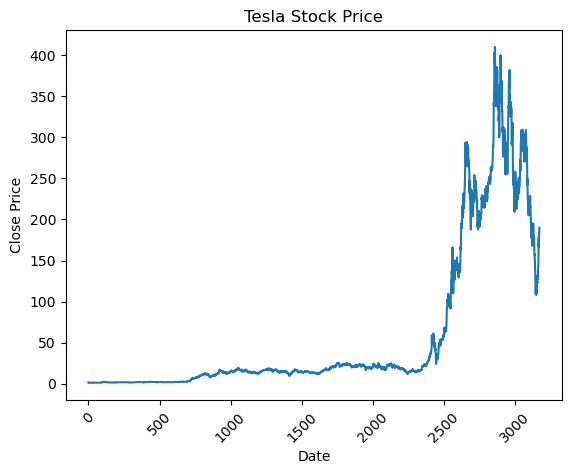

In [14]:
import matplotlib.pyplot as plt
def make_graph(data, revenue, title):
    plt.plot(data.Close)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.xticks(rotation=45)
    plt.show()
make_graph(tesla_data, tesla_revenue, 'Tesla Stock Price')

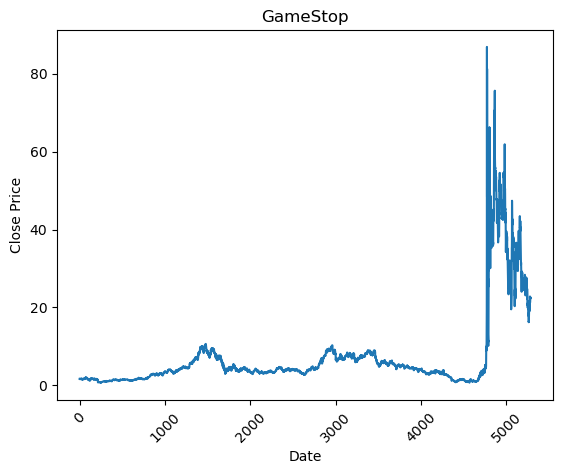

In [15]:
make_graph(gme_data, gme_revenue, 'GameStop')